***

# Linear Regression
### Given a dataset: $\{(x_i, y_i)\}$, find a function $\hat{y}_i=f_\theta(x_i)$ to approximate the dataset.
### objective: minimize some predefined loss: 
$$\Large
L(\theta)=\frac{1}{N}\sum_il(\hat{y}_i,y_i)=\frac{1}{N}\sum_il(f_\theta(x_i),y_i)$$

### Linear Model:
$$
\Large
\hat{y}_i=f_\theta(x_i)=\theta_1^Tx_i+\theta_0
$$
Q: what's the correct format for Linear Model?

### L2 Loss:
$$
\Large
L(\theta)=\frac{1}{N}\sum_il(f_\theta(x_i),y_i)=\frac{1}{N}\sum_i||f_\theta(x_i)-y_i||_2^2
$$
Q: when y is one dimentional, what's the L2 loss?
$$
\Large
L(\theta)=\frac{1}{N}\sum_i(f_\theta(x_i)-y_i)^2
$$


# Gradient Descent
### Theory: Taylor Expansion (1d case)
#### Consider the case where we want to minimize $f(x)$ by gradient descent. Then we need to use the following update rule:
Q: what's the update rule?
$$
\Large
x_{t+1}\leftarrow x_t-\alpha\frac{\partial f}{\partial x}(x_t)
$$
#### Here is a simple proof (not rigorous) to understand why this can iteratively minimize the loss if we have a correct step size $\alpha$.

$$
\Large
f(x)=f(x_0)+\frac{\partial f}{\partial x}(x_0)(x-x_0)+\frac{1}{2!}\frac{\partial^2 f}{(\partial x)^2}(x_0)(x-x_0)^2+\dots
$$
#### When $(x-x_0)^k$ where $k\geq2$ is small enough with respect to $(x-x_0)$, we have
$$
\Large
f(x)\approx f(x_0)+\frac{\partial f}{\partial x}(x_0)(x-x_0)
$$

Hence during gradient descent, when our step size $\alpha$ is small, then ???
$|x_{t+1}-x_t|$ is small.

Hence
$$
\Large
f(x_{t+1})\approx f(x_t)+\frac{\partial f}{\partial x}(x_t)(x_{t+1}-x_t)\\
%???
\Large
=f(x_t)+\frac{\partial f}{\partial x}(x_t)(-\alpha\frac{\partial f}{\partial x}(x_t))
\\
\Large
\leq f(x_t)
$$

#### So after this step your loss function is non-increasing.

### Rigorous proof will use the definition of limit and convergence when we define gradient. 🤓
### If interested, can check the definition of sequence, convergence and limit here: http://www1.se.cuhk.edu.hk/~manchoso/1920/engg5501/C-real.pdf

### Using this derivation, gradient descent with loss function $L(\theta)$ will look like:
$$
\Large
%???
\theta_{t+1}\leftarrow\theta_t-\alpha\frac{\partial L}{\partial\theta}(\theta_t)
$$
### Don't forget the $\alpha$ term!


# Numerical Computation of Gradient
## Key Insight: Definition of Gradient
$$
\Large
\frac{\partial f}{\partial x}(x)=\lim_{dx\to0}\frac{f(x+dx)-f(x)}{dx}
%???
$$
Hence we can approximate:
$$
\Large
\frac{\partial f}{\partial x}(x)\approx\frac{f(x+dx)-f(x)}{dx}
$$
For small enough dx.


# Advanced: Automatic Differentiation (frequently used in Deep Learning libraries)
## Mostly using Chain Rule
## Many Softwares
#### https://en.wikipedia.org/wiki/Automatic_differentiation
#### https://www.cs.toronto.edu/~rgrosse/courses/csc321_2018/slides/lec10.pdf
#### https://www.jmlr.org/papers/volume18/17-468/17-468.pdf (if interested in research)

In [1]:
# import
import numpy as np
import matplotlib.pyplot as plt

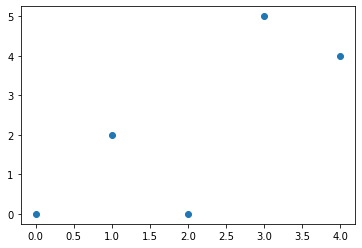

In [2]:
# dataset
x = [0., 1., 2., 3., 4.]
y = [0., 2., 0., 5., 4.]
x = np.array(x)
y = np.array(y)
plt.scatter(x,y)

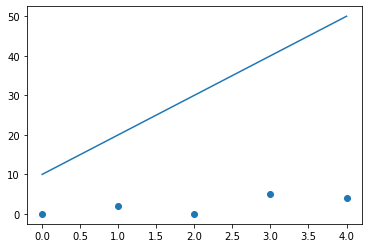

In [17]:
# define linear model
# \hat{y} = theta0 + theta1 * x

def f(theta0, theta1, x):
    # given paramter theta, and datapoint x, return the predicted value y
    # TODO
    return theta0 + theta1 * x

# randomly pick theta0 and theta1, visualize
theta0 = 10.
theta1 = 10.
y_pred = f(theta0, theta1, x)
plt.scatter(x,y)
plt.plot(x, y_pred)

In [18]:
# define loss function
# L = 1/N sum_i (hat{y}_i-y_i)^2
def L(theta0, theta1, x, y):
    # TODO
    res = (f(theta0, theta1, x) - y) ** 2
    res = res.mean()
    return res
# check for our previously picked theta0 and theta1
L(theta0, theta1, x, y)

933.0

In [19]:
# gradient decsent to find the right theta0 and theta1
# L_0: dL/dtheta_0 = 1/N sum_i 2(hat{y}_i-y_i)
def L_0(theta0, theta1, x, y):
    # return the gradient 
    # TODO
    res = 2*(f(theta0, theta1, x) - y)
    res = res.mean()
    return res
# check the current gradient
L_0(theta0, theta1, x, y)

55.6

In [20]:
# gradient decsent to find the right theta0 and theta1
# L_0: dL/dtheta_1 = 1/N sum_i 2(hat{y}_i-y_i)(x_i)
def L_1(theta0, theta1, x, y):
    # return the gradient
    # TODO
    res = 2*(f(theta0, theta1, x) - y)*x
    res = res.mean()
    return res
# check the current gradient
L_1(theta0, theta1, x, y)

146.8

iteration 0:
loss: 703.088112
gradient: dL/dtheta0 = 55.600000, dL/dtheta1 = 146.800000
iteration 10:
loss: 51.505278
gradient: dL/dtheta0 = 15.761719, dL/dtheta1 = 33.909864
iteration 20:
loss: 13.695621
gradient: dL/dtheta0 = 6.164387, dL/dtheta1 = 7.190536
iteration 30:
loss: 10.535930
gradient: dL/dtheta0 = 3.747382, dL/dtheta1 = 0.903522
iteration 40:
loss: 9.441548
gradient: dL/dtheta0 = 3.041380, dL/dtheta1 = -0.540853
iteration 50:
loss: 8.566758
gradient: dL/dtheta0 = 2.748860, dL/dtheta1 = -0.839506
iteration 60:
loss: 7.796087
gradient: dL/dtheta0 = 2.561666, dL/dtheta1 = -0.869001
iteration 70:
loss: 7.112685
gradient: dL/dtheta0 = 2.406297, dL/dtheta1 = -0.837068
iteration 80:
loss: 6.506416
gradient: dL/dtheta0 = 2.264923, dL/dtheta1 = -0.792829
iteration 90:
loss: 5.968561
gradient: dL/dtheta0 = 2.132943, dL/dtheta1 = -0.747802
iteration 100:
loss: 5.491400
gradient: dL/dtheta0 = 2.008912, dL/dtheta1 = -0.704595
iteration 110:
loss: 5.068082
gradient: dL/dtheta0 = 1.8921

<ipython-input-22-45c321bb79d2>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-22-45c321bb79d2>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-22-45c321bb79d2>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-22-45c321bb79d2>:23: Runt

iteration 230:
loss: 2.531047
gradient: dL/dtheta0 = 0.922484, dL/dtheta1 = -0.323590
iteration 240:
loss: 2.441783
gradient: dL/dtheta0 = 0.868879, dL/dtheta1 = -0.304786
iteration 250:
loss: 2.362592
gradient: dL/dtheta0 = 0.818389, dL/dtheta1 = -0.287075
iteration 260:
loss: 2.292337
gradient: dL/dtheta0 = 0.770833, dL/dtheta1 = -0.270393
iteration 270:
loss: 2.230010
gradient: dL/dtheta0 = 0.726040, dL/dtheta1 = -0.254681
iteration 280:
loss: 2.174716
gradient: dL/dtheta0 = 0.683850, dL/dtheta1 = -0.239882
iteration 290:
loss: 2.125662
gradient: dL/dtheta0 = 0.644112, dL/dtheta1 = -0.225942
iteration 300:
loss: 2.082143
gradient: dL/dtheta0 = 0.606682, dL/dtheta1 = -0.212813
iteration 310:
loss: 2.043534
gradient: dL/dtheta0 = 0.571428, dL/dtheta1 = -0.200446
iteration 320:
loss: 2.009283
gradient: dL/dtheta0 = 0.538223, dL/dtheta1 = -0.188798
iteration 330:
loss: 1.978896
gradient: dL/dtheta0 = 0.506947, dL/dtheta1 = -0.177827
iteration 340:
loss: 1.951939
gradient: dL/dtheta0 = 0

<ipython-input-22-45c321bb79d2>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-22-45c321bb79d2>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-22-45c321bb79d2>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-22-45c321bb79d2>:23: Runt

iteration 370:
loss: 1.887983
gradient: dL/dtheta0 = 0.398992, dL/dtheta1 = -0.139959
iteration 380:
loss: 1.871284
gradient: dL/dtheta0 = 0.375806, dL/dtheta1 = -0.131826
iteration 390:
loss: 1.856470
gradient: dL/dtheta0 = 0.353968, dL/dtheta1 = -0.124165
iteration 400:
loss: 1.843327
gradient: dL/dtheta0 = 0.333399, dL/dtheta1 = -0.116950
iteration 410:
loss: 1.831667
gradient: dL/dtheta0 = 0.314026, dL/dtheta1 = -0.110154
iteration 420:
loss: 1.821323
gradient: dL/dtheta0 = 0.295778, dL/dtheta1 = -0.103753
iteration 430:
loss: 1.812147
gradient: dL/dtheta0 = 0.278590, dL/dtheta1 = -0.097724
iteration 440:
loss: 1.804005
gradient: dL/dtheta0 = 0.262401, dL/dtheta1 = -0.092045
iteration 450:
loss: 1.796783
gradient: dL/dtheta0 = 0.247153, dL/dtheta1 = -0.086697
iteration 460:
loss: 1.790375
gradient: dL/dtheta0 = 0.232791, dL/dtheta1 = -0.081659
iteration 470:
loss: 1.784691
gradient: dL/dtheta0 = 0.219264, dL/dtheta1 = -0.076914
iteration 480:
loss: 1.779648
gradient: dL/dtheta0 = 0

<ipython-input-22-45c321bb79d2>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-22-45c321bb79d2>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-22-45c321bb79d2>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-22-45c321bb79d2>:23: Runt

iteration 550:
loss: 1.757148
gradient: dL/dtheta0 = 0.135822, dL/dtheta1 = -0.047644
iteration 560:
loss: 1.755213
gradient: dL/dtheta0 = 0.127929, dL/dtheta1 = -0.044875
iteration 570:
loss: 1.753497
gradient: dL/dtheta0 = 0.120495, dL/dtheta1 = -0.042268
iteration 580:
loss: 1.751974
gradient: dL/dtheta0 = 0.113494, dL/dtheta1 = -0.039811
iteration 590:
loss: 1.750623
gradient: dL/dtheta0 = 0.106898, dL/dtheta1 = -0.037498
iteration 600:
loss: 1.749424
gradient: dL/dtheta0 = 0.100687, dL/dtheta1 = -0.035319
iteration 610:
loss: 1.748360
gradient: dL/dtheta0 = 0.094836, dL/dtheta1 = -0.033267
iteration 620:
loss: 1.747417
gradient: dL/dtheta0 = 0.089325, dL/dtheta1 = -0.031333
iteration 630:
loss: 1.746580
gradient: dL/dtheta0 = 0.084134, dL/dtheta1 = -0.029513


<ipython-input-22-45c321bb79d2>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-22-45c321bb79d2>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-22-45c321bb79d2>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-22-45c321bb79d2>:23: Runt

iteration 640:
loss: 1.745838
gradient: dL/dtheta0 = 0.079245, dL/dtheta1 = -0.027798
iteration 650:
loss: 1.745179
gradient: dL/dtheta0 = 0.074640, dL/dtheta1 = -0.026182
iteration 660:
loss: 1.744594
gradient: dL/dtheta0 = 0.070303, dL/dtheta1 = -0.024661
iteration 670:
loss: 1.744076
gradient: dL/dtheta0 = 0.066218, dL/dtheta1 = -0.023228
iteration 680:
loss: 1.743616
gradient: dL/dtheta0 = 0.062370, dL/dtheta1 = -0.021878
iteration 690:
loss: 1.743208
gradient: dL/dtheta0 = 0.058746, dL/dtheta1 = -0.020607
iteration 700:
loss: 1.742846
gradient: dL/dtheta0 = 0.055332, dL/dtheta1 = -0.019409
iteration 710:
loss: 1.742525
gradient: dL/dtheta0 = 0.052117, dL/dtheta1 = -0.018281
iteration 720:
loss: 1.742240
gradient: dL/dtheta0 = 0.049088, dL/dtheta1 = -0.017219
iteration 730:
loss: 1.741987
gradient: dL/dtheta0 = 0.046236, dL/dtheta1 = -0.016219
iteration 740:
loss: 1.741763
gradient: dL/dtheta0 = 0.043549, dL/dtheta1 = -0.015276
iteration 750:
loss: 1.741564
gradient: dL/dtheta0 = 0

<ipython-input-22-45c321bb79d2>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-22-45c321bb79d2>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-22-45c321bb79d2>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-22-45c321bb79d2>:23: Runt

iteration 760:
loss: 1.741388
gradient: dL/dtheta0 = 0.038635, dL/dtheta1 = -0.013552
iteration 770:
loss: 1.741231
gradient: dL/dtheta0 = 0.036390, dL/dtheta1 = -0.012765
iteration 780:
loss: 1.741092
gradient: dL/dtheta0 = 0.034275, dL/dtheta1 = -0.012023
iteration 790:
loss: 1.740969
gradient: dL/dtheta0 = 0.032283, dL/dtheta1 = -0.011324
iteration 800:
loss: 1.740859
gradient: dL/dtheta0 = 0.030407, dL/dtheta1 = -0.010666
iteration 810:
loss: 1.740763
gradient: dL/dtheta0 = 0.028640, dL/dtheta1 = -0.010047
iteration 820:
loss: 1.740676
gradient: dL/dtheta0 = 0.026976, dL/dtheta1 = -0.009463
iteration 830:
loss: 1.740600
gradient: dL/dtheta0 = 0.025409, dL/dtheta1 = -0.008913
iteration 840:
loss: 1.740532
gradient: dL/dtheta0 = 0.023932, dL/dtheta1 = -0.008395
iteration 850:
loss: 1.740472
gradient: dL/dtheta0 = 0.022541, dL/dtheta1 = -0.007907
iteration 860:
loss: 1.740419
gradient: dL/dtheta0 = 0.021232, dL/dtheta1 = -0.007448


<ipython-input-22-45c321bb79d2>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-22-45c321bb79d2>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-22-45c321bb79d2>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-22-45c321bb79d2>:23: Runt

iteration 870:
loss: 1.740372
gradient: dL/dtheta0 = 0.019998, dL/dtheta1 = -0.007015
iteration 880:
loss: 1.740330
gradient: dL/dtheta0 = 0.018836, dL/dtheta1 = -0.006607
iteration 890:
loss: 1.740293
gradient: dL/dtheta0 = 0.017741, dL/dtheta1 = -0.006223
iteration 900:
loss: 1.740260
gradient: dL/dtheta0 = 0.016710, dL/dtheta1 = -0.005862
iteration 910:
loss: 1.740230
gradient: dL/dtheta0 = 0.015739, dL/dtheta1 = -0.005521
iteration 920:
loss: 1.740204
gradient: dL/dtheta0 = 0.014825, dL/dtheta1 = -0.005200
iteration 930:
loss: 1.740181
gradient: dL/dtheta0 = 0.013963, dL/dtheta1 = -0.004898
iteration 940:
loss: 1.740161
gradient: dL/dtheta0 = 0.013152, dL/dtheta1 = -0.004613
iteration 950:
loss: 1.740143
gradient: dL/dtheta0 = 0.012388, dL/dtheta1 = -0.004345
iteration 960:
loss: 1.740127
gradient: dL/dtheta0 = 0.011668, dL/dtheta1 = -0.004093


<ipython-input-22-45c321bb79d2>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-22-45c321bb79d2>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-22-45c321bb79d2>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-22-45c321bb79d2>:23: Runt

iteration 970:
loss: 1.740112
gradient: dL/dtheta0 = 0.010990, dL/dtheta1 = -0.003855
iteration 980:
loss: 1.740100
gradient: dL/dtheta0 = 0.010351, dL/dtheta1 = -0.003631
iteration 990:
loss: 1.740088
gradient: dL/dtheta0 = 0.009750, dL/dtheta1 = -0.003420


<ipython-input-22-45c321bb79d2>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-22-45c321bb79d2>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-22-45c321bb79d2>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


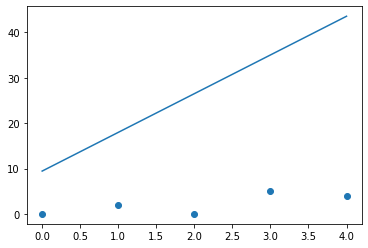

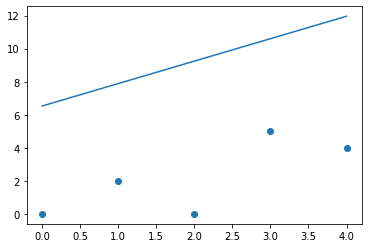

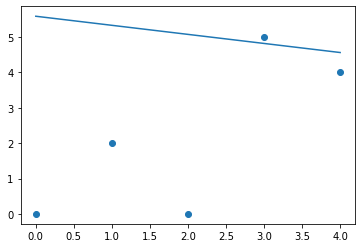

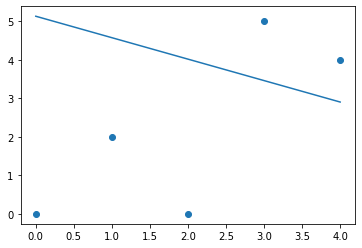

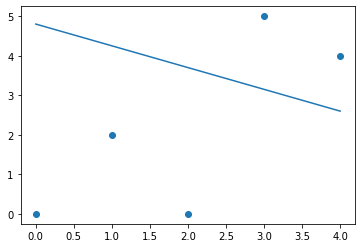

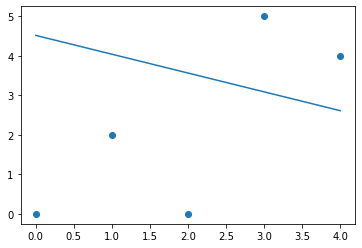

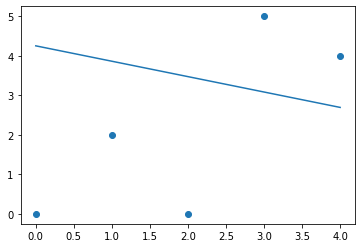

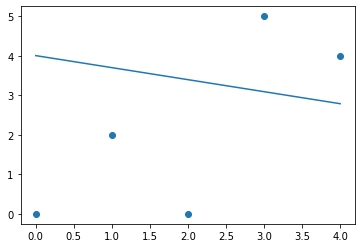

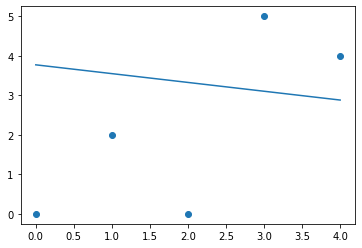

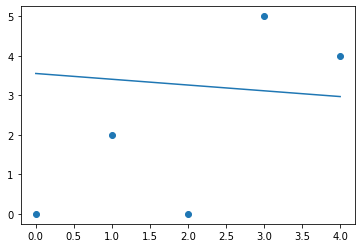

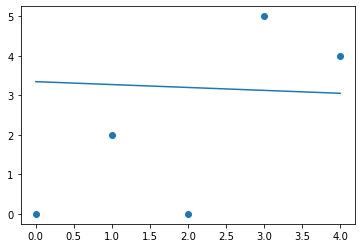

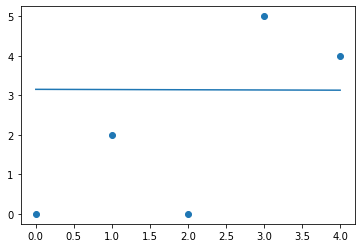

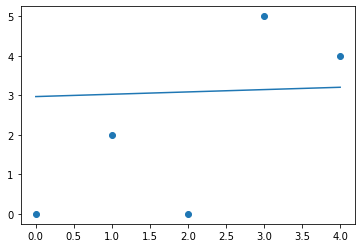

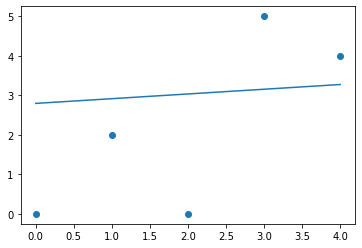

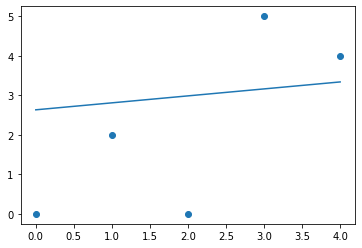

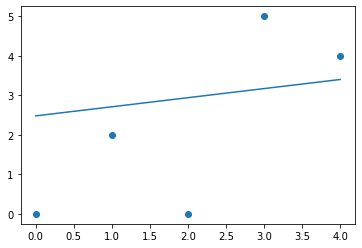

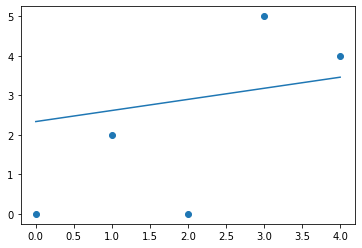

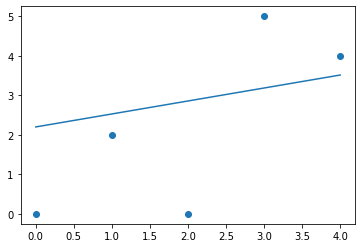

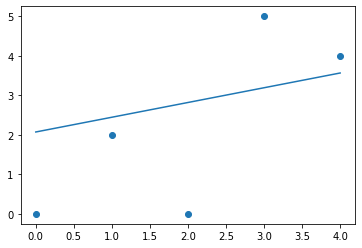

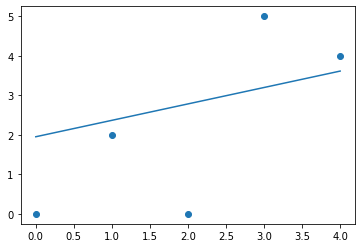

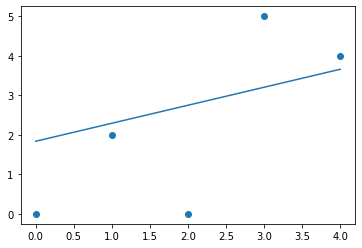

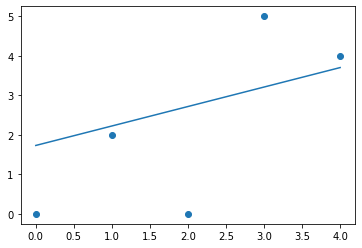

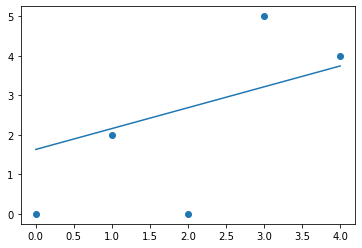

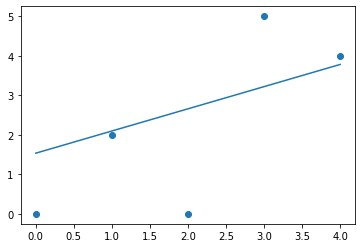

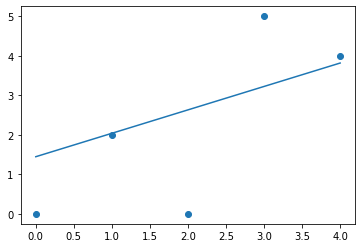

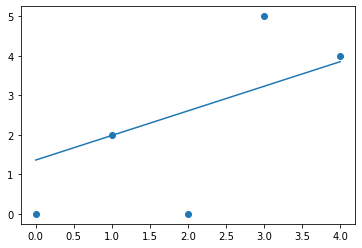

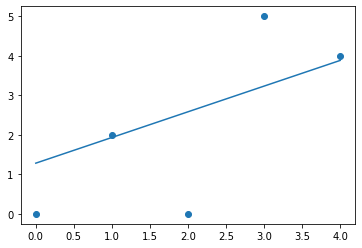

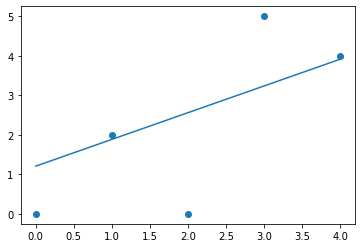

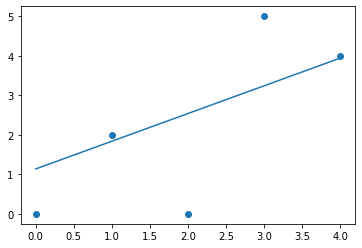

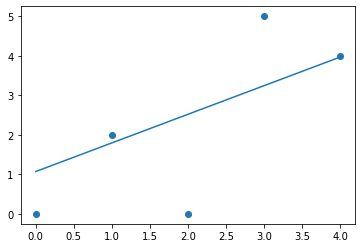

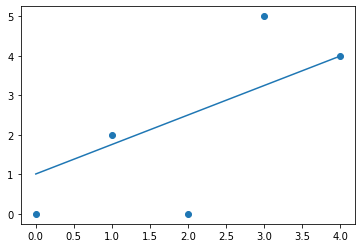

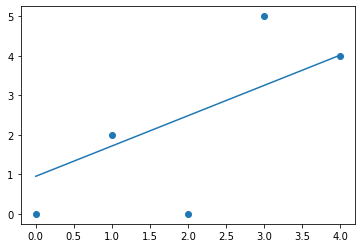

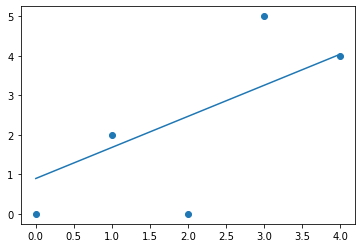

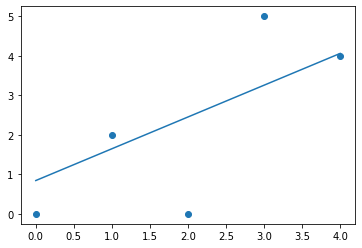

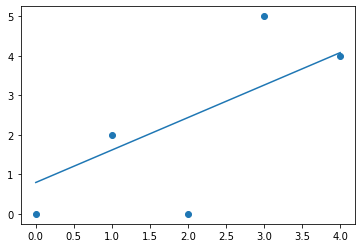

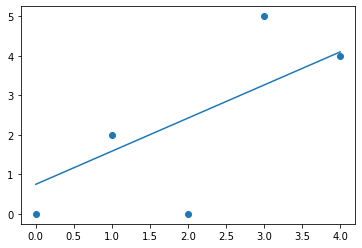

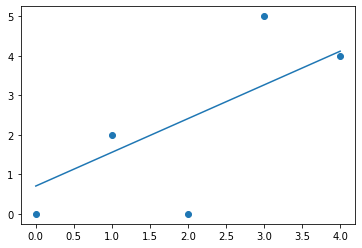

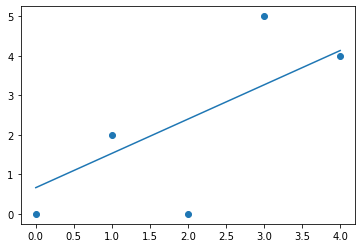

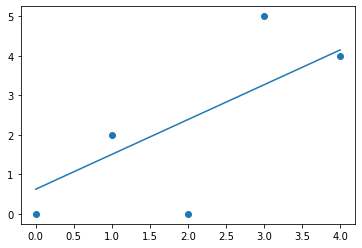

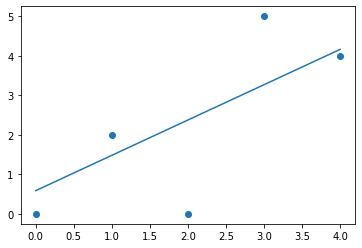

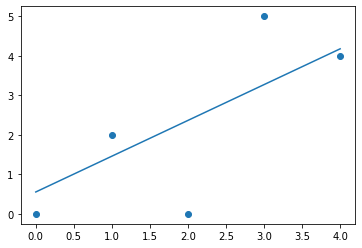

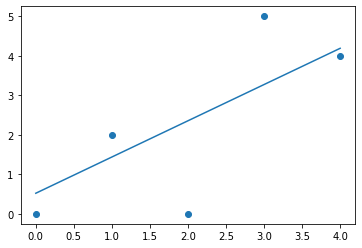

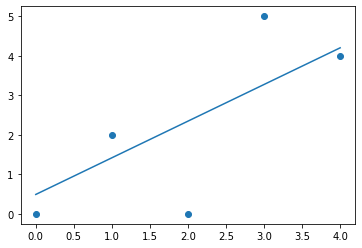

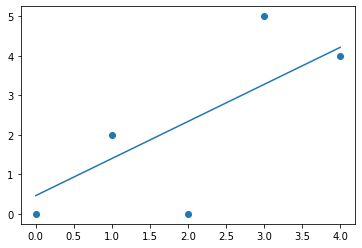

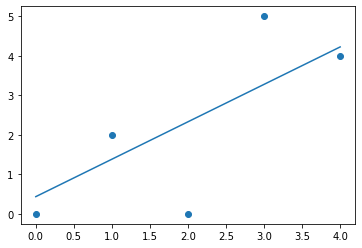

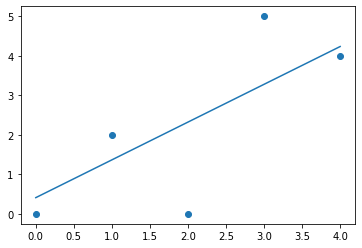

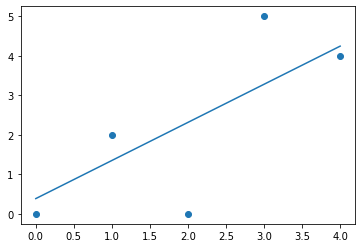

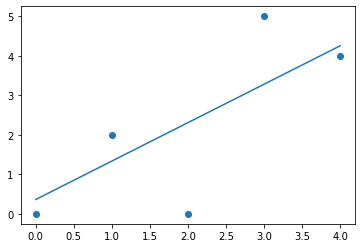

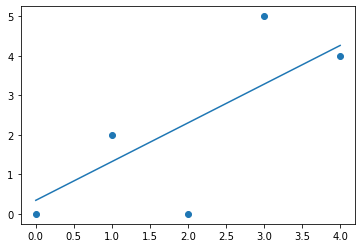

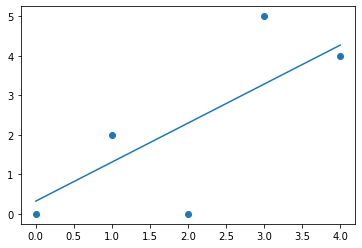

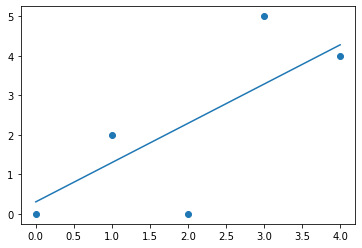

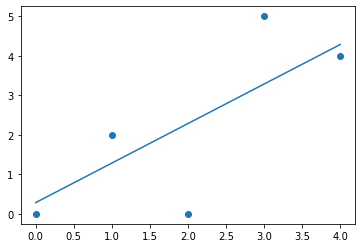

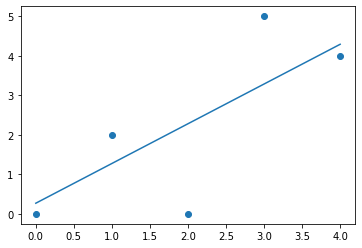

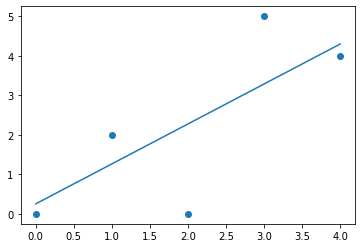

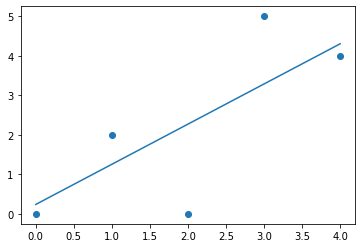

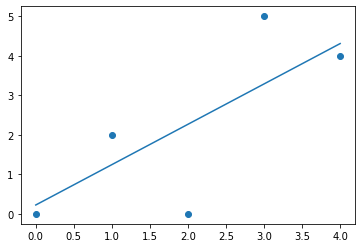

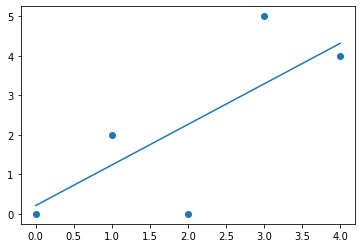

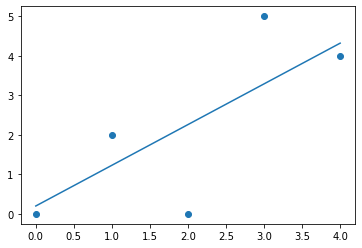

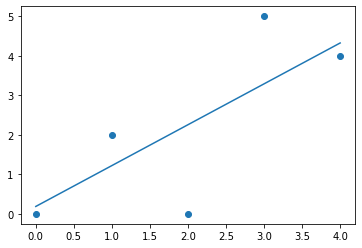

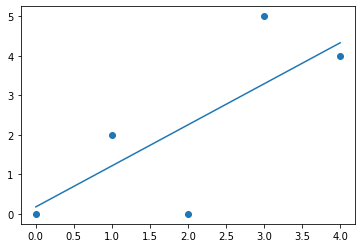

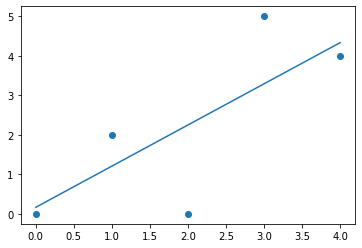

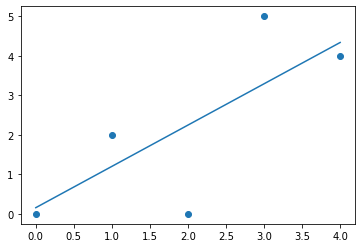

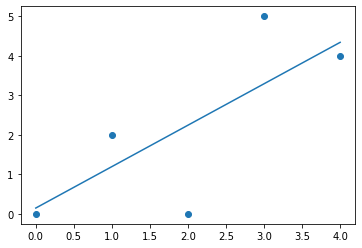

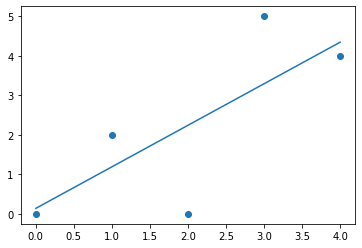

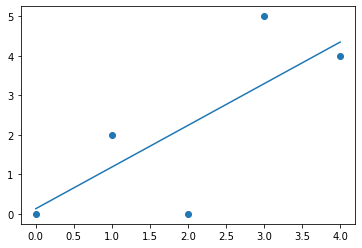

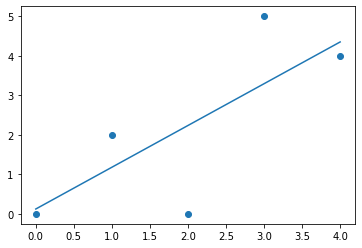

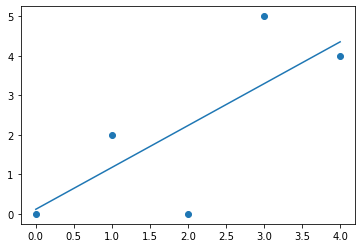

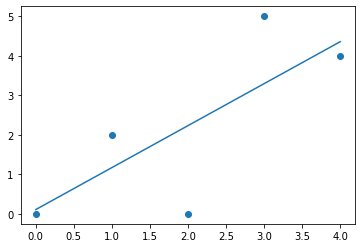

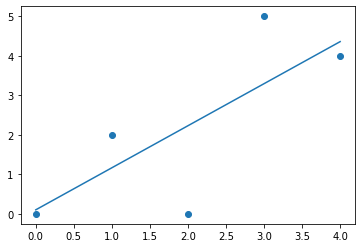

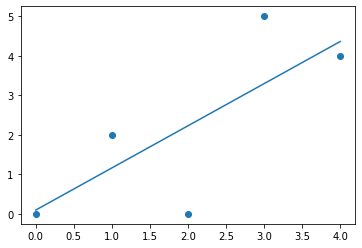

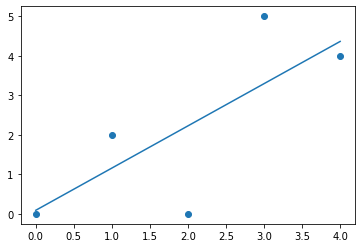

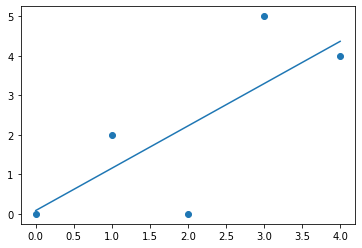

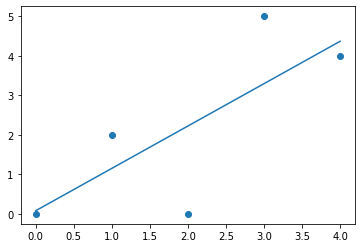

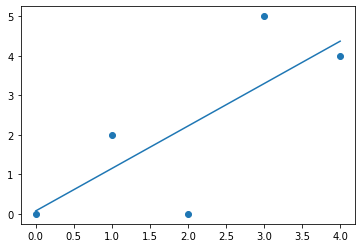

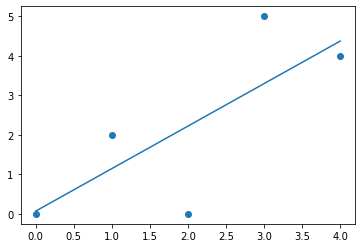

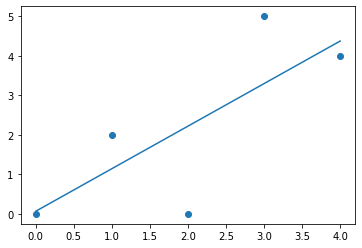

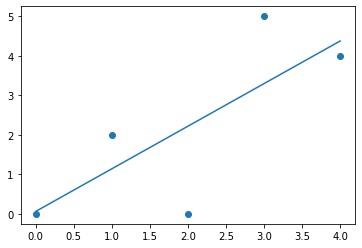

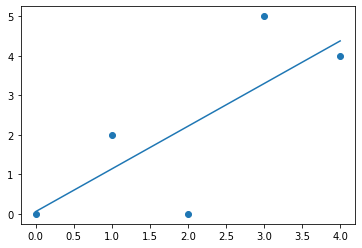

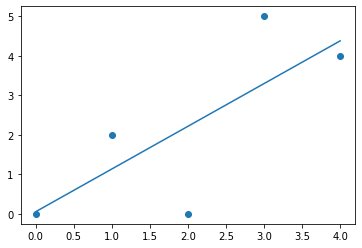

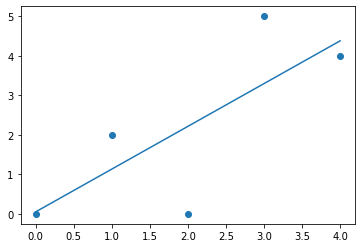

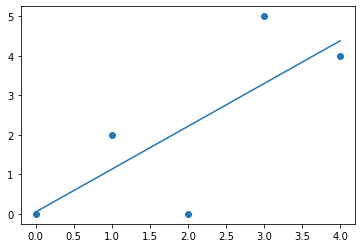

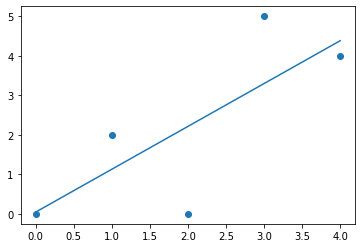

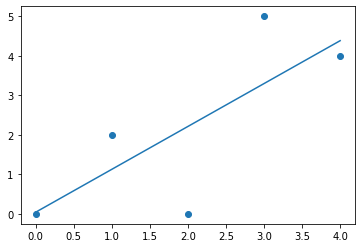

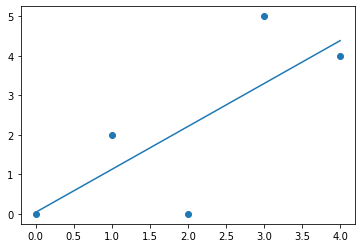

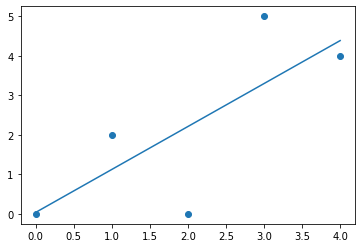

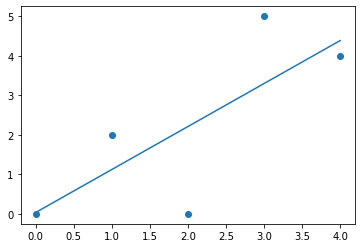

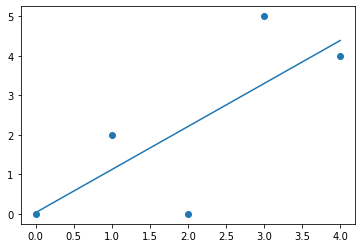

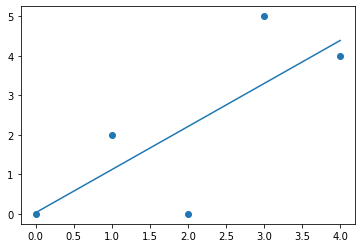

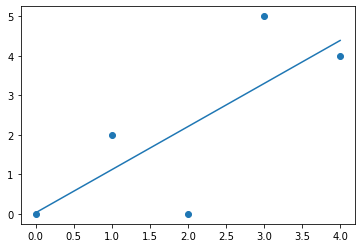

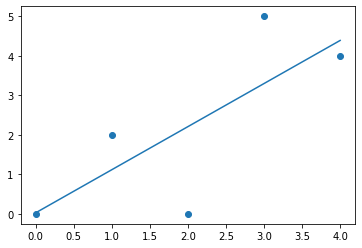

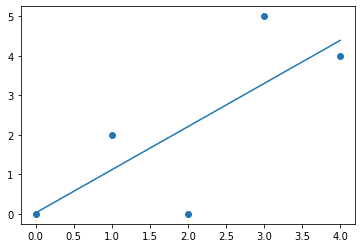

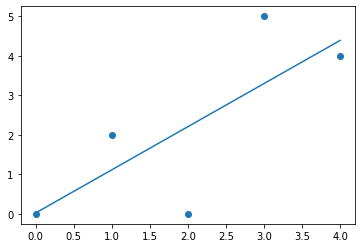

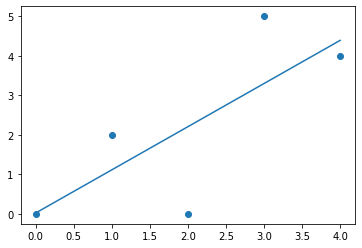

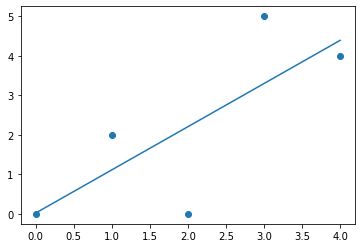

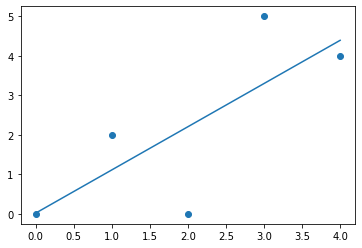

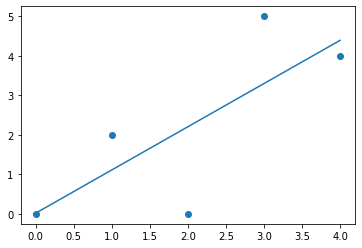

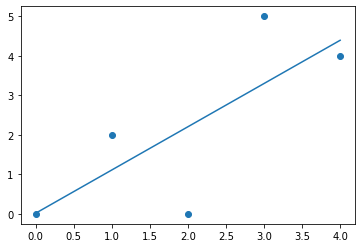

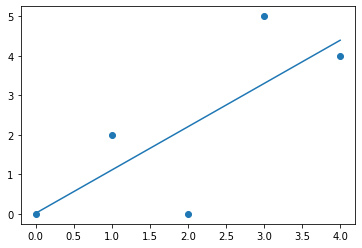

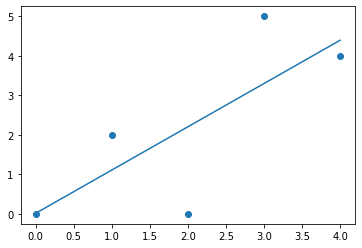

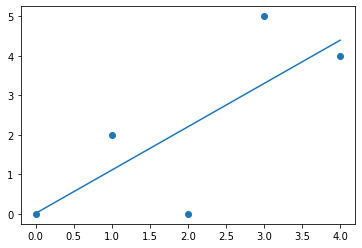

In [22]:
# gradient descent
# define parameters
num_iter = 1000
alpha = 0.01 # step sz

# initialization
theta0 = 10.
theta1 = 10.
var_theta0 = theta0
var_theta1 = theta1
for i in range(num_iter):
    # TODO: complete the entire gradient descent pipeline
    d_theta0 = L_0(var_theta0,var_theta1,x,y)
    d_theta1 = L_1(var_theta0,var_theta1,x,y)
    var_theta0 = var_theta0 - alpha * d_theta0
    var_theta1 = var_theta1 - alpha * d_theta1
    # logging
    if i % 10 == 0:
        print('iteration %d:' % (i))
        print('loss: %f' % (L(var_theta0, var_theta1, x, y)))
        print('gradient: dL/dtheta0 = %f, dL/dtheta1 = %f' % (d_theta0, d_theta1))
        y_pred = f(var_theta0, var_theta1, x)
        plt.figure()
        plt.scatter(x,y)
        plt.plot(x, y_pred)

# Stochastic Gradient Descent

iteration 0:
loss: 3.292079
gradient: dL/dtheta0 = -5.117664, dL/dtheta1 = -20.470656
iteration 10:
loss: 1.763827
gradient: dL/dtheta0 = 0.933155, dL/dtheta1 = 3.732618
iteration 20:
loss: 1.753889
gradient: dL/dtheta0 = 0.986794, dL/dtheta1 = 3.947174
iteration 30:
loss: 1.748293
gradient: dL/dtheta0 = 1.024318, dL/dtheta1 = 4.097272
iteration 40:
loss: 1.745108
gradient: dL/dtheta0 = 1.051903, dL/dtheta1 = 4.207610
iteration 50:
loss: 1.743268
gradient: dL/dtheta0 = 1.072181, dL/dtheta1 = 4.288722
iteration 60:
loss: 1.742186
gradient: dL/dtheta0 = 1.087087, dL/dtheta1 = 4.348349
iteration 70:
loss: 1.741537
gradient: dL/dtheta0 = 1.098046, dL/dtheta1 = 4.392183
iteration 80:
loss: 1.741140
gradient: dL/dtheta0 = 1.106102, dL/dtheta1 = 4.424406
iteration 90:
loss: 1.740890
gradient: dL/dtheta0 = 1.112024, dL/dtheta1 = 4.448094


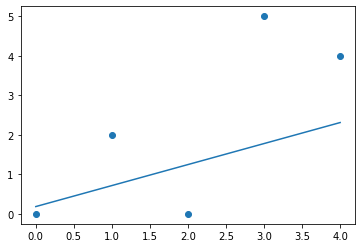

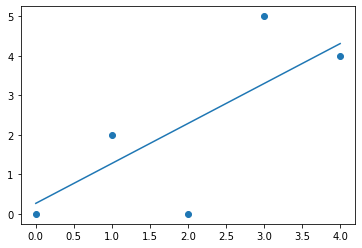

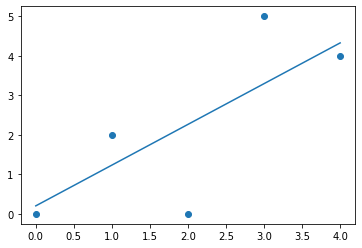

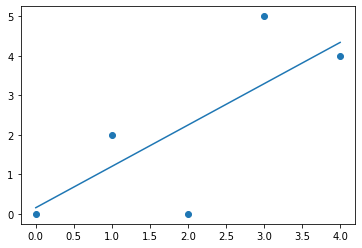

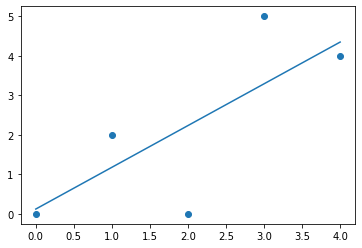

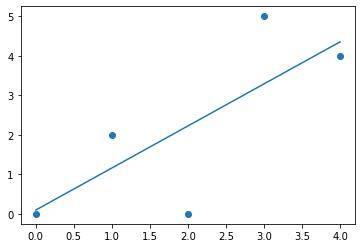

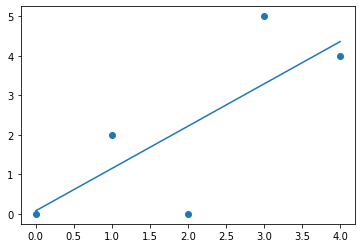

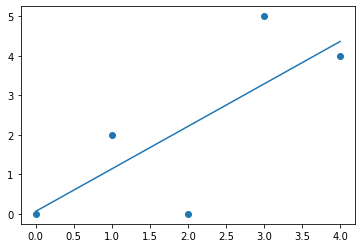

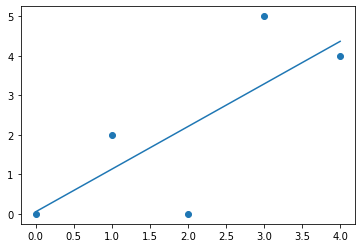

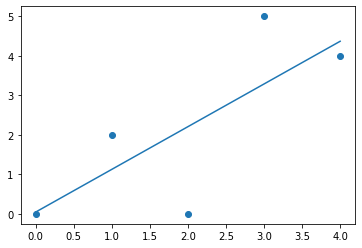

In [23]:
# Stochastic gradient descent
# define parameters
num_iter = 100
alpha = 0.01 # step sz

# for SGD
batch_size = 1


# initialization
theta0 = 0.
theta1 = 0.
var_theta0 = theta0
var_theta1 = theta1
for i in range(num_iter):
    for j in range(0, len(x), batch_size):
        d_theta0 = L_0(var_theta0,var_theta1,x[j:j+batch_size],y[j:j+batch_size])
        d_theta1 = L_1(var_theta0,var_theta1,x[j:j+batch_size],y[j:j+batch_size])
        var_theta0 = var_theta0 - alpha * d_theta0
        var_theta1 = var_theta1 - alpha * d_theta1
        
    # logging after each epoch (finishing all batches)
    if i % 10 == 0:
        print('iteration %d:' % (i))
        print('loss: %f' % (L(var_theta0, var_theta1, x, y)))
        print('gradient: dL/dtheta0 = %f, dL/dtheta1 = %f' % (d_theta0, d_theta1))
        y_pred = f(var_theta0, var_theta1, x)
        plt.figure()
        plt.scatter(x,y)
        plt.plot(x, y_pred)


## Q&A for labs and quiz

## Thank you!